In [2]:
import pandas as pd

path_data = "../data/"
filename = "bike-rentals.csv"

df = pd.read_csv(path_data + filename)
df.head()

day  mnth  year  season  holiday  weekday  workingday  weathersit  \
0    1     1  2011       1        0        6           0           2   
1    2     1  2011       1        0        0           0           2   
2    3     1  2011       1        0        1           1           1   
3    4     1  2011       1        0        2           1           1   
4    5     1  2011       1        0        3           1           1   

       temp     atemp       hum  windspeed  rentals  
0  0.344167  0.363625  0.805833   0.160446      331  
1  0.363478  0.353739  0.696087   0.248539      131  
2  0.196364  0.189405  0.437273   0.248309      120  
3  0.200000  0.212122  0.590435   0.160296      108  
4  0.226957  0.229270  0.436957   0.186900       82

In [8]:
import os
path = os.getcwd()
os.chdir("..")
from module import LOGGER
from module.data_exploration import *
import module.preprocessing as pr

In [34]:
def convert_to_categorical(data: pd.DataFrame, columns_names: list):
    for var in columns_names:
        data[var] = data[var].astype('object')
    return data

data = convert_to_categorical(df, columns_names=['season', 'workingday', 'weathersit', 'holiday'])
get_categorical_features(data)


['season', 'holiday', 'workingday', 'weathersit']

In [50]:
data[feature].plot.boxplot()

AttributeError: 'PlotAccessor' object has no attribute 'boxplot'

In [52]:
len(categorical_features)

4

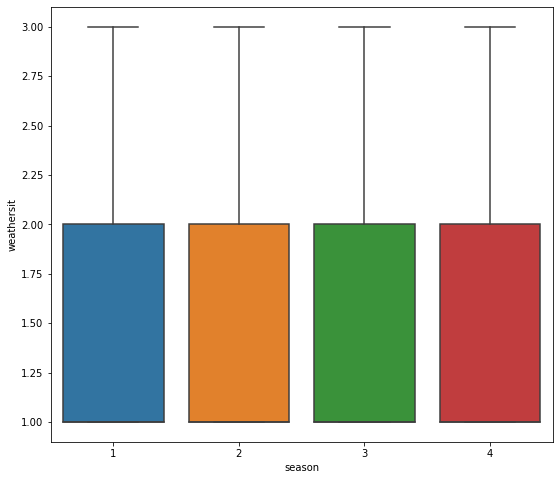

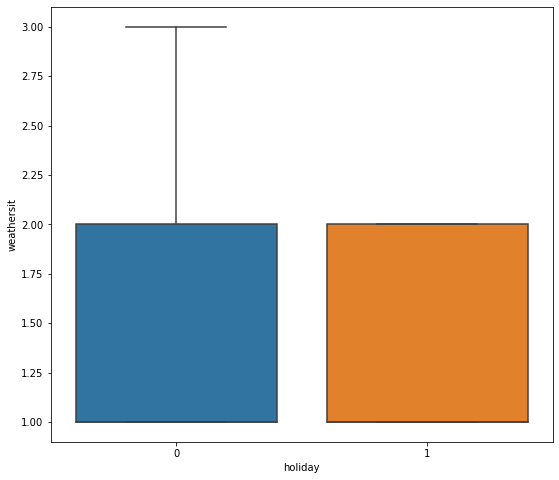

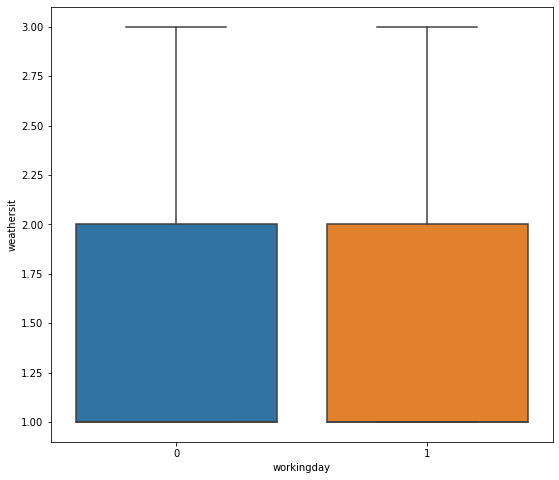

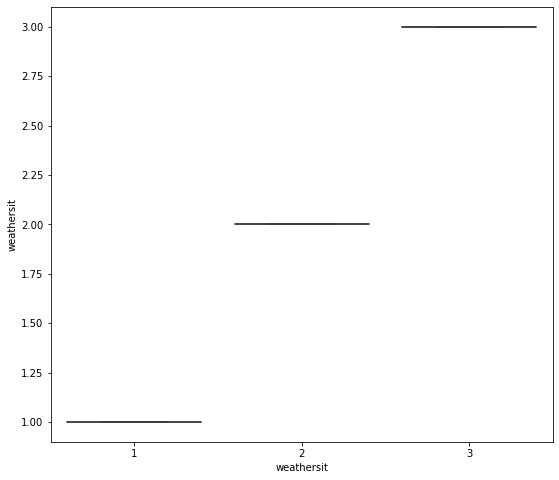

In [60]:
# Plotting num features 
for feature in categorical_features:
    plt.figure(figsize=(9, 8))
    #plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    sns.boxplot(x=feature, y=target, data=data)
    #plt.boxplot(x = train)
    c = c + 1
    plt.show()

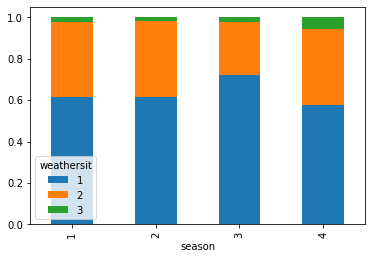

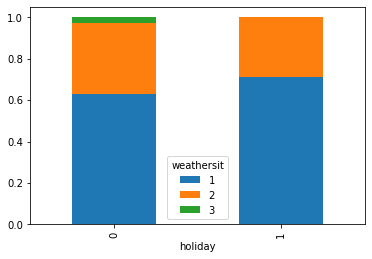

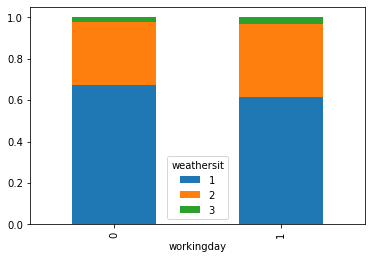

In [48]:
target = "weathersit"
# check data[target] type: must be category
if data[target].dtypes.name != "object":
    raise ValueError(f"Variable '{target}' is not 'categorical feature'.")
categorical_features = get_categorical_features(data)
features = [x for x in categorical_features if x != target]
for feature in features:
    crostab = pd.crosstab(data[feature], data[target])
    crostab.div(crostab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [45]:
categorical_features

['season', 'holiday', 'workingday', 'weathersit']

In [47]:
features = [x for x in categorical_features if x!= target]
features

['season', 'holiday', 'workingday']

In [62]:
kind = 'bar'
kind == "bar"

True

In [2]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]